# Import and Clean the Data

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None) 

# refrenced url for info on viewing all columns in a dataframe 
#(https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame)

In [2]:
df = pd.read_csv('../data/2train.csv', keep_default_na=False)

In [3]:
df.isnull().sum().sum()

0

In [4]:
# df.shape

# df.dropna().shape

# df.head(2)

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
# df.columns

# df.shape

# EDA

In [7]:
cor = df.corr()[['SalePrice']]
cor['SalePrice'].sort_values(ascending=False).head()

SalePrice       1.000000
Overall Qual    0.811789
Gr Liv Area     0.698460
Garage Area     0.668216
Garage Cars     0.661720
Name: SalePrice, dtype: float64

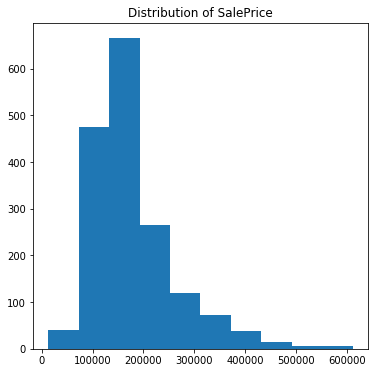

In [8]:
plt.figure(figsize=(6,6))
plt.hist(df['SalePrice'])
plt.title('Distribution of SalePrice');

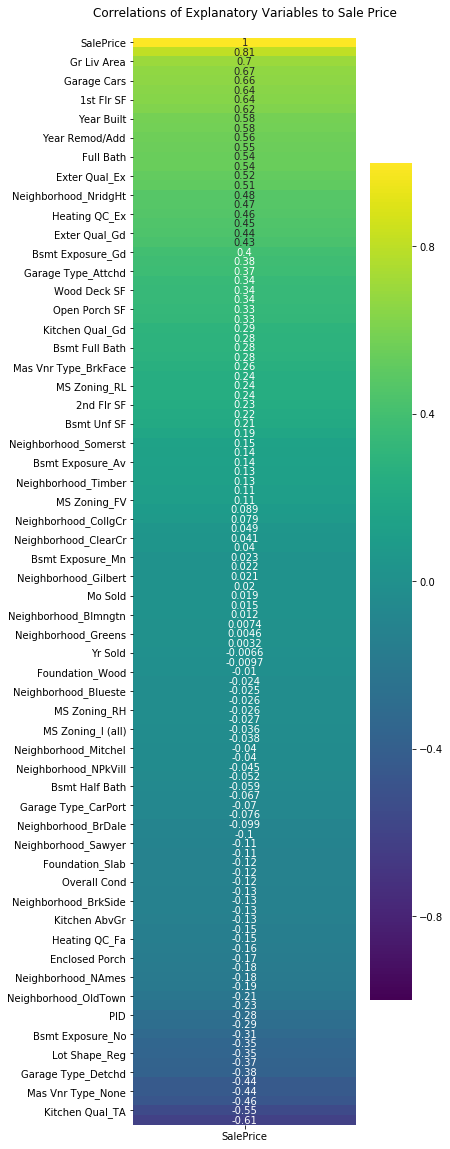

In [9]:
plt.figure(figsize=(5,20))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',
                                                ascending=False),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='viridis')
plt.title('Correlations of Explanatory Variables to Sale Price\n');

#vmin and vmax make the scale of the correlation data -1:1

# Fit, Train, Test, and Score our Model

In [10]:
features = ['Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA', 'Mas Vnr Type_None', 
'Garage Finish_Unf', 'Garage Type_Detchd', 'Foundation_CBlock', 'Lot Shape_Reg',
'Heating QC_TA', 'Bsmt Exposure_No', 'MS Zoning_RM', 'Overall Qual', 'Gr Liv Area',
'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual_Ex', 'Year Built', 
'Kitchen Qual_Ex', 'Year Remod/Add', 'Foundation_PConc', 'Full Bath', 'Mas Vnr Area',
'Exter Qual_Ex', 'TotRms AbvGrd']

X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [11]:
# X.columns

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

lcv= LassoCV(n_alphas=200, cv=5)
lcv.fit(X_train_scaled, y_train)

C:\Users\joeda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [13]:
lcv.alpha_

2122.9170342689076

In [14]:
max(lcv.alphas_)

63726.48382718076

In [15]:
min(lcv.alphas_)

63.72648382718082

In [16]:
# Train Score

lcv.score(X_train_scaled, y_train)

0.8240841054951643

In [17]:
# Test Score

lcv.score(X_test_scaled, y_test)

0.8677529139755226

In [18]:
lcv.coef_

array([-2244.45240478, -1015.45763791,    -0.        ,     0.        ,
       -1191.75099051, -2381.28793213,    -0.        , -2411.91483201,
        -815.62867347, -1957.13760514, -3960.93649721, 22311.01202154,
       16678.52600956,  4258.75507046,  7962.34333844,  3742.97362612,
         595.979234  , 11626.91940173,  1298.92213237,  6108.02200576,
        3407.243639  ,     0.        ,     0.        ,  5396.73490038,
        1446.04519332,     0.        ])

In [19]:
from sklearn.metrics import mean_squared_error

X_test_preds = lcv.predict(X_test_scaled)

np.sqrt(mean_squared_error(y_test, X_test_preds))

31620.390133065273

# Submitting Predictions

In [20]:
test = pd.read_csv('../data/test2.csv')

# test.head()

# test.shape

In [21]:
test_X = test[X.columns]
# test_X.isnull().sum()
test_X_s = ss.transform(test_X)
preds = lcv.predict(test_X_s)

# preds

C:\Users\joeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
from datetime import datetime

In [23]:
timestamp = str(datetime.now()).replace(':','.').split('.')[0]

to_submit = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})

to_submit.to_csv(f'my_submission_{timestamp}.csv', index=False)